In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install wordcloud
%pip install nltk
%pip install seaborn
%pip install scikit-learn
%pip install confusion-matrix
%pip install PySastrawi

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py) ... done
  Created wheel for confusion-matrix: filename=confusion_matrix-0.1-py3-none-any.whl size=2400 sha256=d636bf1c730787af96173ad08a9687c12fa79144ac8ffa8ece35931855ac18a2
  Stored in directory: /root/.cache/pip/wheels/2a/86/a7/df011be982e86cf5084b4e47b183f46b0773f928abb5c12adb
Successfully built confusion-matrix
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 5.6 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart t

In [2]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [3]:
import string
import matplotlib.pyplot as plt
import pandas as pd
import regex as re
import numpy as np
import seaborn as sns
import wordcloud
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.preprocessing import LabelEncoder
from collections import Counter


In [4]:
data = pd.read_csv('/kaggle/input/product-review/PRDECT-ID.csv')

In [5]:
kamus_tidak_baku = pd.read_csv('/kaggle/input/product-review/kamusalay.csv', encoding='ISO-8859-1', header = None)
kamus_tb_dict = kamus_tidak_baku.set_index(0).to_dict('dict')[1]

In [6]:
data.index +=1
display(data)
data.columns

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
1,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
2,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
3,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
5,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy
...,...,...,...,...,...,...,...,...,...,...,...
5396,Household,PCK-01 Penjepit Barang / Pickup Tool Ver.1 Ala...,Jakarta Pusat,35000,4.9,1431,562,5,"Harga bersaing, barang sesuai pesanan. Saya na...",Positive,Love
5397,Household,Ultrasonic Aroma Diffuser Humidifier Colorful ...,Jakarta Utara,99000,4.9,15529,4074,5,Beli ini krn Anak & Istri mau liburan di Jakar...,Positive,Love
5398,Household,Ultrasonic Aroma Diffuser Humidifier Colorful ...,Jakarta Utara,99000,4.9,15529,4074,5,"pengemasan barang baik, kondisi barang jg utuh...",Positive,Happy
5399,Household,Ultrasonic Aroma Diffuser Humidifier Colorful ...,Jakarta Utara,99000,4.9,15529,4074,5,Mungil tapi bekerja dng baik. Dan murahh terja...,Positive,Happy


Index(['Category', 'Product Name', 'Location', 'Price', 'Overall Rating',
       'Number Sold', 'Total Review', 'Customer Rating', 'Customer Review',
       'Sentiment', 'Emotion'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 1 to 5400
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         5400 non-null   object 
 1   Product Name     5400 non-null   object 
 2   Location         5400 non-null   object 
 3   Price            5400 non-null   int64  
 4   Overall Rating   5400 non-null   float64
 5   Number Sold      5400 non-null   int64  
 6   Total Review     5400 non-null   int64  
 7   Customer Rating  5400 non-null   int64  
 8   Customer Review  5400 non-null   object 
 9   Sentiment        5400 non-null   object 
 10  Emotion          5400 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 464.2+ KB


In [8]:
data.describe()

,Price,Overall Rating,Number Sold,Total Review,Customer Rating
count,5.400000e+03,5400.000000,5400.000000,5400.000000,5400.000000
mean,2.386961e+05,4.854389,15961.951852,2168.645556,3.087037
std,8.016337e+05,0.108259,74201.913338,2915.666035,1.766258
min,1.000000e+02,4.100000,9.000000,4.000000,1.000000
25%,2.000000e+04,4.800000,1630.000000,576.000000,1.000000
50%,5.990000e+04,4.900000,3794.500000,1192.000000,3.000000
75%,1.500000e+05,4.900000,9707.000000,2582.000000,5.000000
max,1.539900e+07,5.000000,1000000.000000,24500.000000,5.000000


In [9]:
data['Customer Review']

1       Alhamdulillah berfungsi dengan baik. Packaging...
2       barang bagus dan respon cepat, harga bersaing ...
3       barang bagus, berfungsi dengan baik, seler ram...
4       bagus sesuai harapan penjual nya juga ramah. t...
5       Barang Bagus, pengemasan Aman, dapat Berfungsi...
                              ...                        
5396    Harga bersaing, barang sesuai pesanan. Saya na...
5397    Beli ini krn Anak & Istri mau liburan di Jakar...
5398    pengemasan barang baik, kondisi barang jg utuh...
5399    Mungil tapi bekerja dng baik. Dan murahh terja...
5400    Produk sesuai deskripsi, packing aman terlindu...
Name: Customer Review, Length: 5400, dtype: object

In [10]:
data = pd.DataFrame(data)
data = data[['Customer Review', 'Emotion']]
data = data.rename(columns={"Customer Review":"text", "Emotion":"label"})
data

,text,label
1,Alhamdulillah berfungsi dengan baik. Packaging...,Happy
2,"barang bagus dan respon cepat, harga bersaing ...",Happy
3,"barang bagus, berfungsi dengan baik, seler ram...",Happy
4,bagus sesuai harapan penjual nya juga ramah. t...,Happy
5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Happy
...,...,...
5396,"Harga bersaing, barang sesuai pesanan. Saya na...",Love
5397,Beli ini krn Anak & Istri mau liburan di Jakar...,Love
5398,"pengemasan barang baik, kondisi barang jg utuh...",Happy
5399,Mungil tapi bekerja dng baik. Dan murahh terja...,Happy


In [11]:
data['label']

1       Happy
2       Happy
3       Happy
4       Happy
5       Happy
        ...  
5396     Love
5397     Love
5398    Happy
5399    Happy
5400     Love
Name: label, Length: 5400, dtype: object

In [12]:
data.describe()

,text,label
count,5400,5400
unique,5305,5
top,Kualitas Produk Bagus.,Happy
freq,4,1770


In [13]:
import regex as re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def process_cleaning(text):

    # Replace emoji spesifik, numerik, url, non-word character by spacing
    text_cleaning_re = r"rt|url|[^\w\s]|'|nbsp|https\S+|[0-9]+"
    text_sub = re.sub(text_cleaning_re, ' ', str(text))

    # Remove strip / trims
    text_strip = text_sub.strip()

    # Remove punctutation / tanda baca
    translator = str.maketrans('', '', string.punctuation)
    text_no_punct = text_strip.translate(translator)

    # Lower Case
    text_lower = text_no_punct.casefold()

    # Tokenize
    text_token_stan = word_tokenize(text_lower)

    # Penggantian kata tidak baku / Normalization
    word_dict = []
    for word in text_token_stan:
        word_dict.append(kamus_tb_dict.get(word, word))
    tokens = " ".join(word_dict)

    # Tambah kata singkatan 
    more_stopword = ["sih","nya"]

    # menampung stopword ke variabel untuk jadi operator remove stopword
    stopword_user = StopWordRemoverFactory().get_stop_words() + more_stopword

    # Remove stopword
    token_new = word_tokenize(tokens)
    filter_new = []
    filter_new2 = [word.strip() for word in token_new]
    filter_new = [word for word in filter_new2 if not word in stopword_user]
    tokens = " ".join(filter_new)

    return tokens


In [14]:
import string

data['text_cleaned'] = data['text'].apply(process_cleaning)
x_cleaned = data['text_cleaned']
data.head(15)

,text,label,text_cleaned
1,Alhamdulillah berfungsi dengan baik. Packaging...,Happy,alhamdulillah berfungsi packaging aman respon ...
2,"barang bagus dan respon cepat, harga bersaing ...",Happy,barang bagus respon cepat harga bersaing
3,"barang bagus, berfungsi dengan baik, seler ram...",Happy,barang bagus berfungsi seler ramah pengiriman ...
4,bagus sesuai harapan penjual nya juga ramah. t...,Happy,bagus sesuai harapan penjual ramah terima kasi...
5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Happy,barang bagus pengemasan aman berfungsi
6,"barang bagus, seller ramah..",Happy,barang bagus seller ramah
7,mantap paten joss,Happy,mantap paten joss
8,"Works fine. Respon seller cepat, barang berfun...",Happy,works fine respon seller cepat barang berfungs...
9,barang bagus.. segel.. utuh.. original.. berfu...,Happy,barang bagus segel utuh original berfungsi sel...
10,Barang datang dan berfungsi dengan baik dan te...,Happy,barang berfungsi bagus lampu birunya


After Preprocessing


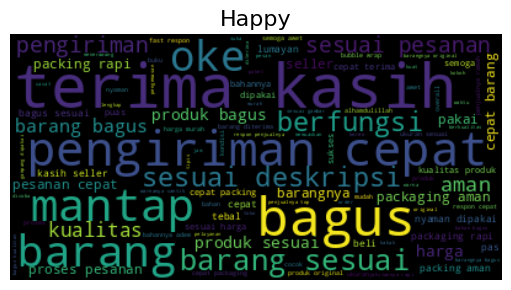

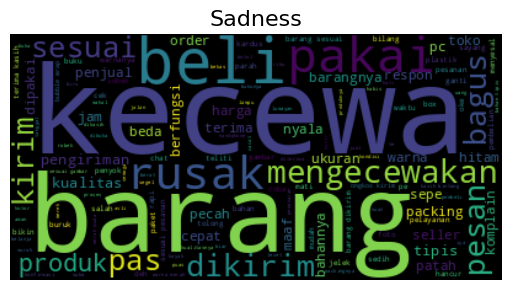

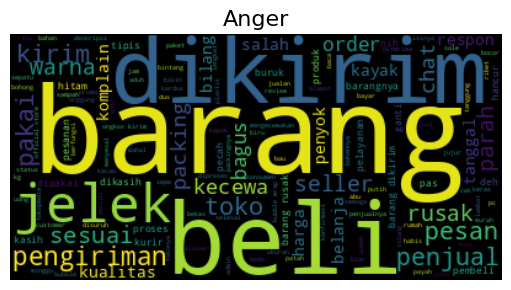

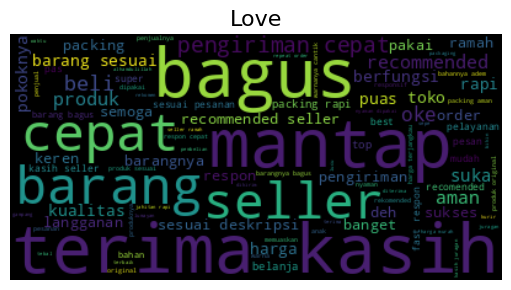

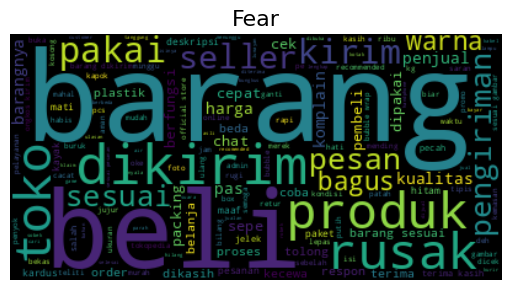

In [15]:
def process_wordCloud(value, emot):
    wordcloud = WordCloud(background_color = "black", max_words = 150).generate(value)
    fig = plt.figure(figsize = (5, 3))
    fig.set_layout_engine('constrained')
    plt.imshow(wordcloud, interpolation = "bilinear", alpha = 1)
    plt.title(emot, size=16)
    plt.axis("off")
    plt.show()
    print()
    return fig

# emotions = ['Happy', 'Love', 'Sadness', 'Fear', 'Anger']
emotions = data['label'].drop_duplicates()

print("After Preprocessing")
text_mixed_aft = ""
for emotion in emotions:
  input_emot = " ".join([emot for emot in data.loc[data['label'] == emotion, 'text']])
  CR_cleaned = process_cleaning(input_emot)
  process_wc = process_wordCloud(CR_cleaned, emotion)
  text_mixed_aft += CR_cleaned

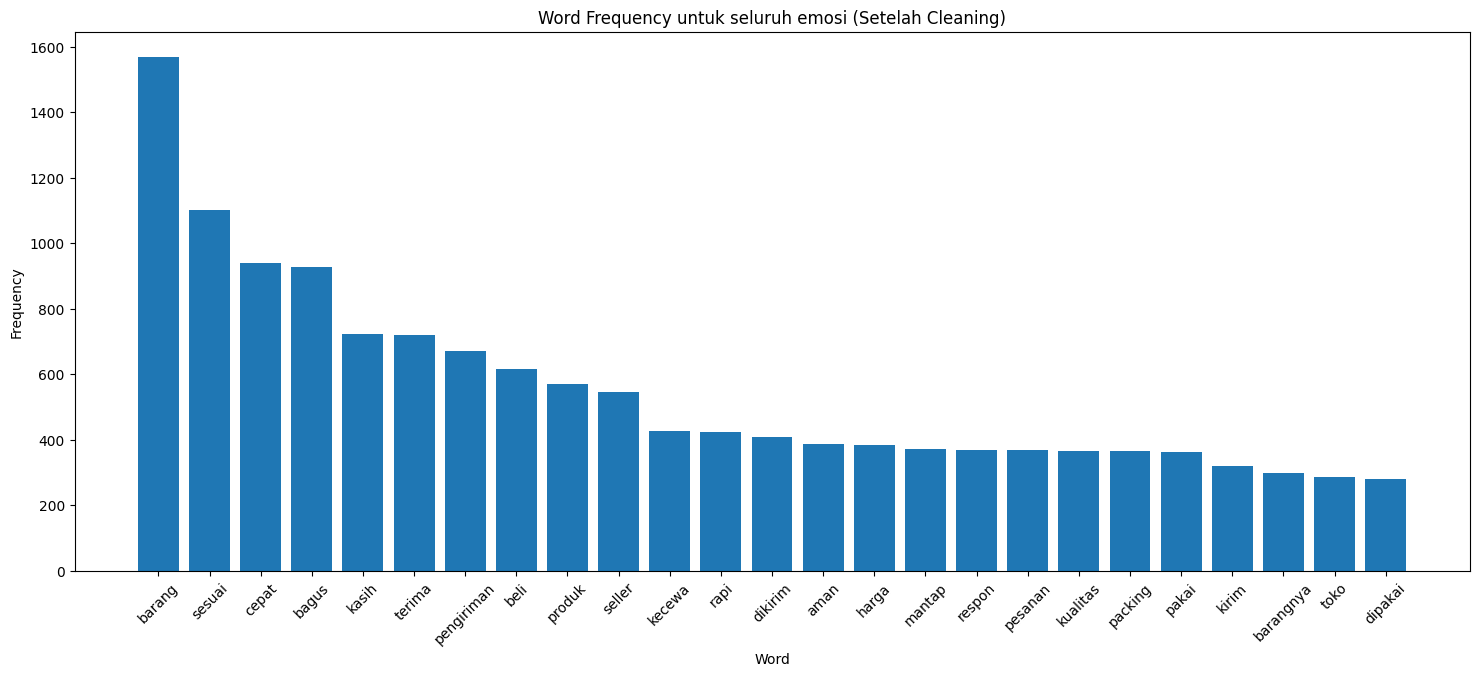

In [16]:
text_list = text_mixed_aft.split()

word_data = Counter(text_list).most_common(25)

plt.figure(figsize=(18, 7))
plt.bar(*zip(*word_data))
plt.title('Word Frequency untuk seluruh emosi (Setelah Cleaning)')
plt.xticks(rotation=45)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

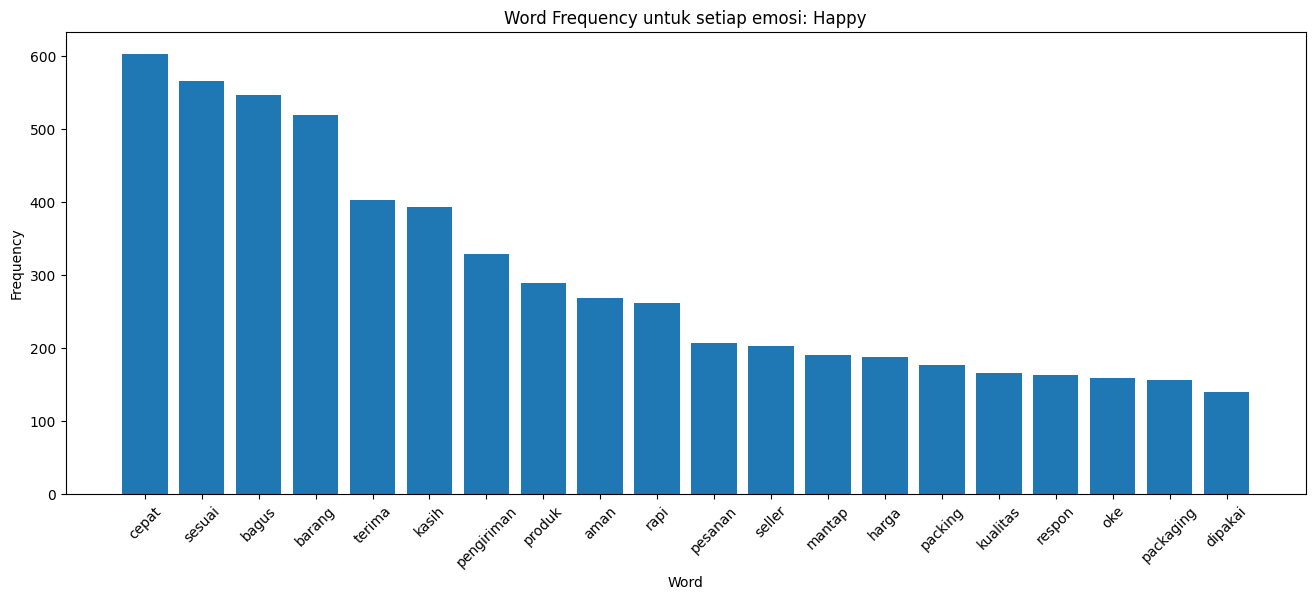

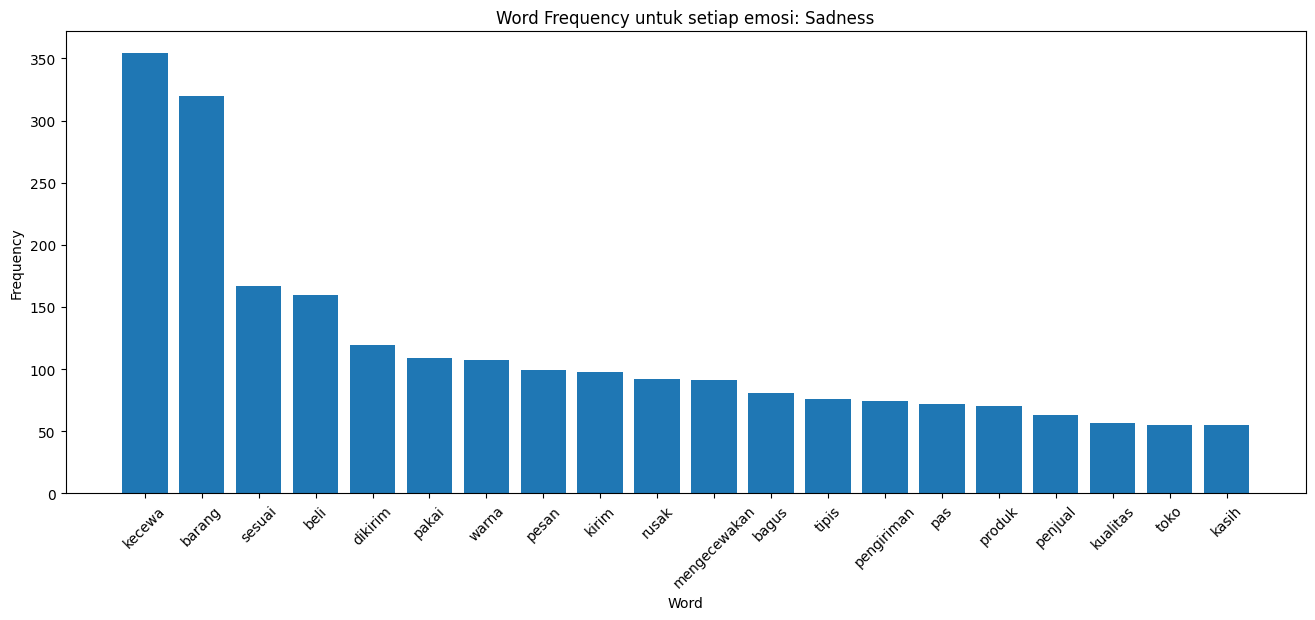

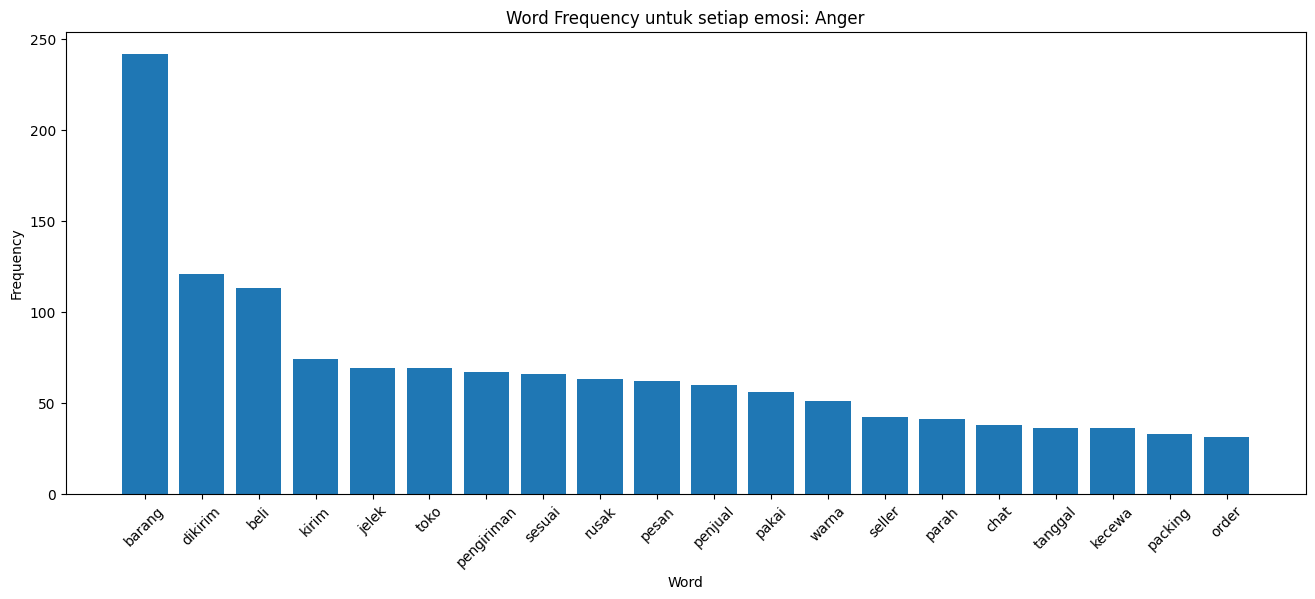

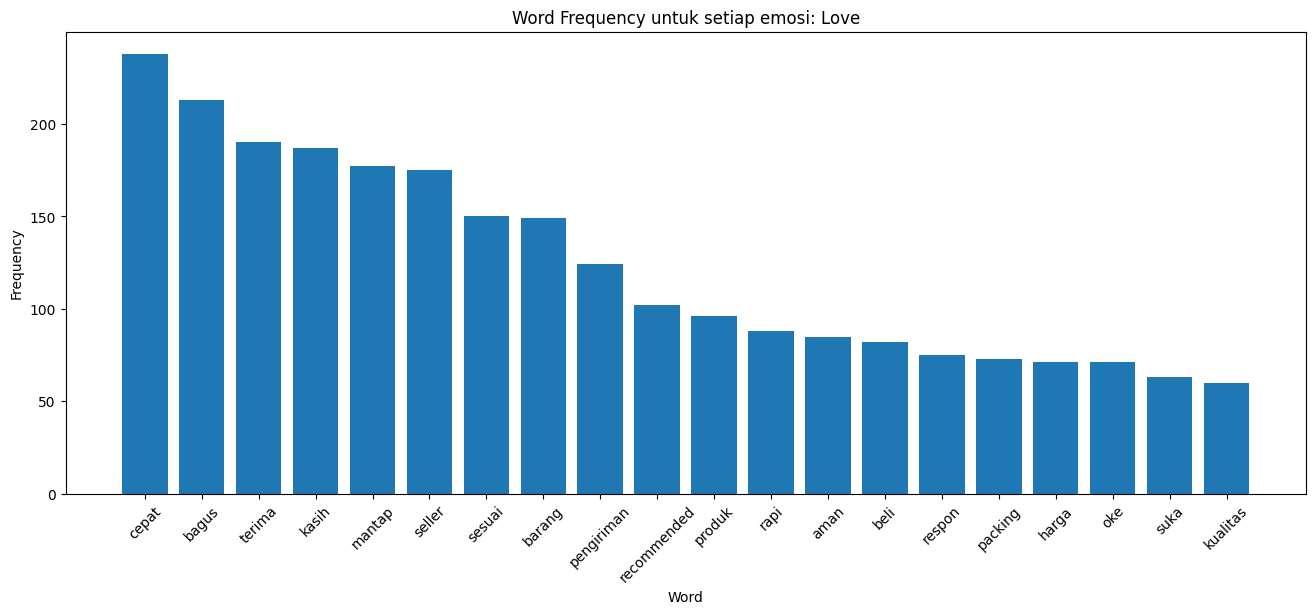

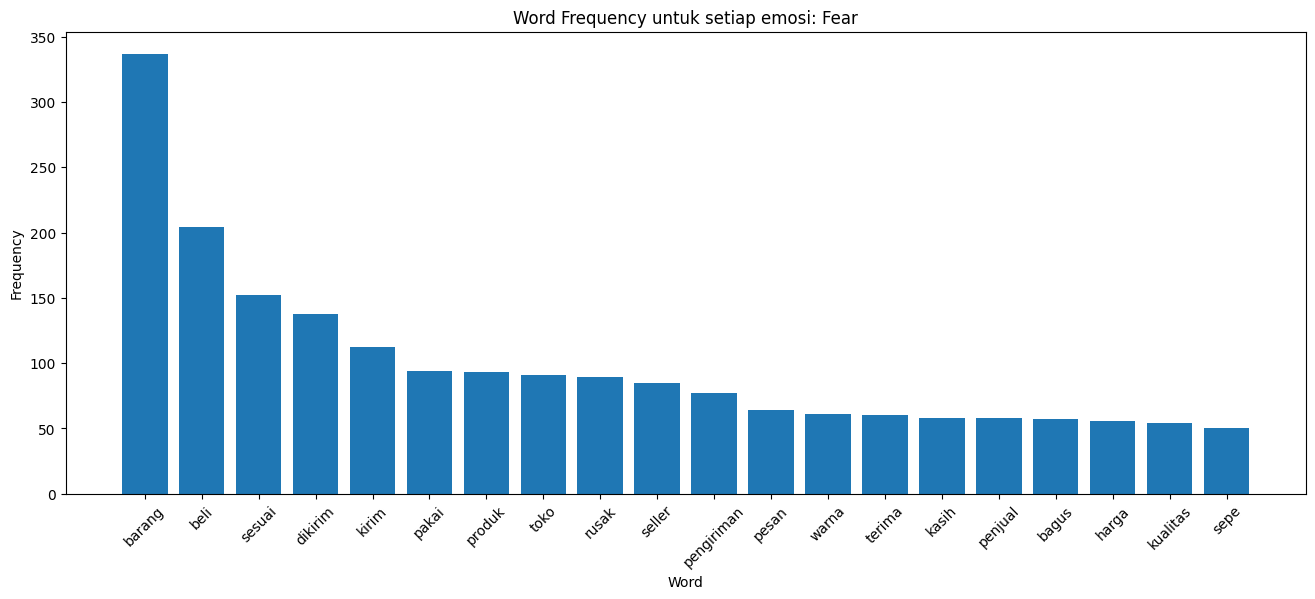

In [17]:
text_container = []
for emotion in emotions:
  text_container = " ".join([emot for emot in data.loc[data['label'] == emotion, 'text']])
  text_cleaned = process_cleaning(text_container)
  text_split = text_cleaned.split()
  word_data = Counter(text_split).most_common(20)

  plt.figure(figsize=(16, 6))
  plt.bar(*zip(*word_data))
  plt.title('Word Frequency untuk setiap emosi: ' + emotion)
  plt.xticks(rotation=45)
  plt.xlabel("Word")
  plt.ylabel("Frequency")
  plt.show()
  print()

In [18]:
print(Counter(data['label']))
label_encoder = LabelEncoder()
data['label_replaced'] = label_encoder.fit_transform(data['label'])
print(Counter(data['label_replaced']))
y_replaced = data['label_replaced']
print(y_replaced)


Counter({'Happy': 1770, 'Sadness': 1202, 'Fear': 920, 'Love': 809, 'Anger': 699})
Counter({2: 1770, 4: 1202, 1: 920, 3: 809, 0: 699})
1       2
2       2
3       2
4       2
5       2
       ..
5396    3
5397    3
5398    2
5399    2
5400    3
Name: label_replaced, Length: 5400, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
co_vect = CountVectorizer()
tf_vect = TfidfVectorizer()
hash_vect = HashingVectorizer()

In [20]:
x = x_cleaned
y = y_replaced
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=225)

print("Sebelum mengubah data train")
print(x_train)
print("\nSebelum mengubah data test")
print(x_test)
print("\nSetelah mengubah data train menggunakan Count Vectorizer")
print("x-train")
print(co_vect.fit_transform(x_train))
print("x-test")
print(co_vect.transform(x_test))
print("\nSetelah mengubah data train menggunakan TF-IDF Vectorizer")
print("x-train")
print(tf_vect.fit_transform(x_train))
print("x-test")
print(tf_vect.transform(x_test))
print("\nSetelah mengubah data train menggunakan Hashing Vectorizer")
print("x-train")
print(hash_vect.fit_transform(x_train))
print("x-test")
print(hash_vect.transform(x_test))
# model_lr_tf = Pipeline([('vectorizer',tf_vect),('classifier',lr)])

Sebelum mengubah data train
123     terima kasihh bos mantappss semoga lancarr ber...
3959    salah kirim judul bolak kembalikan salah kirim...
2785                                               gambar
446     kecewa berat salahnya dimana packing kemasan p...
4781    recommended komunikasi lancar instruksi game g...
                              ...                        
4280          barangnya bagus sesuai harapan terima kasih
2304    order ketiga gerak cepat barang oke pelayanan oke
5295    recomended pelayanan memuaskan respon pengirim...
4595    barang bagus mengecewakan pesan rok kirim kema...
2337                      berguna bermanfaat lancar swiss
Name: text_cleaned, Length: 4320, dtype: object

Sebelum mengubah data test
4262    gonta ganti main sehari beli ratusan ribu mend...
2537                        produk bagus pas sesuai harga
2272    kulit cerah cepat meresap cocok kulit kombinas...
2789                  barang sesuai foto leggingnya sobek
4232    ukuran sesuai baha

In [21]:
# x_co = co_vect.fit_transform(x_cleaned)
# x_tf = tf_vect.fit_transform(x_cleaned)
# x_hash = hash_vect.fit_transform(x_cleaned)

In [22]:
# print(x_co)
# # print(x_co.toarray())
# print(co_vect.get_feature_names_out())

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

print("Banyaknya data x train: ", x_train.shape)
print("Banyaknya data x test: ", x_test.shape)
print("Banyaknya data y train: ", y_train.shape)
print("Banyaknya data y test: ", y_test.shape)

Banyaknya data x train:  (4320,)
Banyaknya data x test:  (1080,)
Banyaknya data y train:  (4320,)
Banyaknya data y test:  (1080,)


In [24]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [25]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

svm = SVC()
# rf = RandomForestClassifier() # boleh isi random state 225 atau 42
lr = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=47)
rf = RandomForestClassifier()


In [36]:
def findEvaluation(test, pred, model_label, vect_label):
    print("\n")
    print("Klasifikasi "+ model_label + " dengan " + vect_label + ":\n")

    labels_test = test.unique()
    cm = confusion_matrix(test, pred, labels=labels_test)
    print("Confusion Matrix")
    print(cm)

    print("\n")
    print("Accuracy:", accuracy_score(test, pred) * 100)
    print("Precision:", precision_score(test, pred, average='macro') * 100)
    print("Recall:", recall_score(test, pred, average='macro') * 100)
    print("F1-Score:", f1_score(test, pred, average='macro') * 100)
    print("\n")
    print(classification_report(test, pred))

    sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm')
    plt.title('Confusion Matrix', fontsize=17, pad=20)
    plt.gca().xaxis.set_label_position('top')
    plt.ylabel('Actual', fontsize=13)
    plt.xlabel('Predicted', fontsize=13)
    plt.gca().xaxis.tick_top()

    plt.gca().figure.subplots_adjust(bottom=0.2)
    plt.show()

def train_model(classification, vect, x_train, y_train):
    model = Pipeline([('vectorizer',vect),('classifier', classification)])
    train = model.fit(x_train, y_train)
    return train



Klasifikasi Support Vector Machine dengan Count Vectorizer:

Confusion Matrix
[[323  13  14  15   0]
 [ 76  52  14  20   1]
 [ 19   0  87  59  13]
 [ 24   1  40 150  15]
 [  8   0  44  54  38]]


Accuracy: 60.18518518518518
Precision: 60.26724758214542
Recall: 52.175535172669555
F1-Score: 52.73392723211063


              precision    recall  f1-score   support

           0       0.57      0.26      0.36       144
           1       0.44      0.49      0.46       178
           2       0.72      0.88      0.79       365
           3       0.79      0.32      0.45       163
           4       0.50      0.65      0.57       230

    accuracy                           0.60      1080
   macro avg       0.60      0.52      0.53      1080
weighted avg       0.62      0.60      0.58      1080



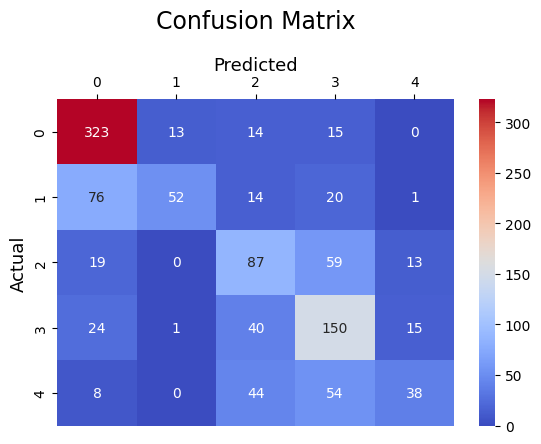



Klasifikasi Support Vector Machine dengan TF-IDF Vectorizer:

Confusion Matrix
[[316  12  15  19   3]
 [ 78  65   5   8   7]
 [ 17   2  77  67  15]
 [ 18   0  45 156  11]
 [  4   0  40  57  43]]


Accuracy: 60.83333333333333
Precision: 60.56202001906868
Recall: 53.47965362263507
F1-Score: 54.472072422090356


              precision    recall  f1-score   support

           0       0.54      0.30      0.39       144
           1       0.42      0.43      0.43       178
           2       0.73      0.87      0.79       365
           3       0.82      0.40      0.54       163
           4       0.51      0.68      0.58       230

    accuracy                           0.61      1080
   macro avg       0.61      0.53      0.54      1080
weighted avg       0.62      0.61      0.59      1080



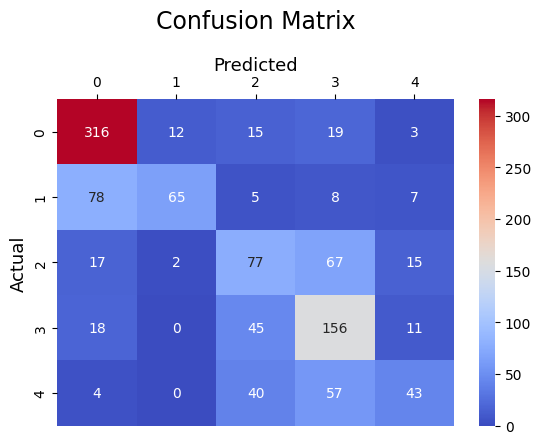



Klasifikasi Support Vector Machine dengan Hashing Vectorizer:

Confusion Matrix
[[320  11  15  18   1]
 [ 79  59   8  15   2]
 [ 20   2  88  53  15]
 [ 22   1  49 145  13]
 [  7   0  48  46  43]]


Accuracy: 60.64814814814815
Precision: 61.00257200994059
Recall: 53.24206870285779
F1-Score: 54.19307889198408


              precision    recall  f1-score   support

           0       0.58      0.30      0.39       144
           1       0.42      0.49      0.46       178
           2       0.71      0.88      0.79       365
           3       0.81      0.36      0.50       163
           4       0.52      0.63      0.57       230

    accuracy                           0.61      1080
   macro avg       0.61      0.53      0.54      1080
weighted avg       0.62      0.61      0.59      1080



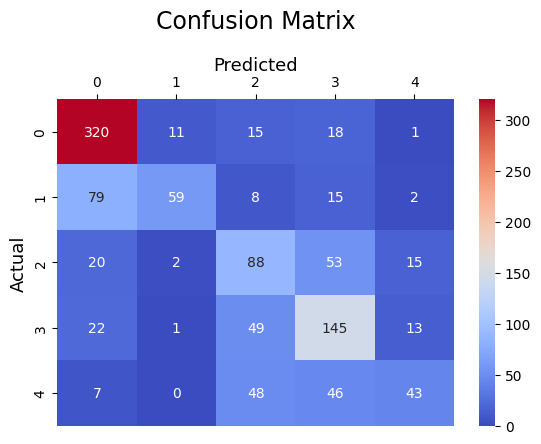

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




Klasifikasi Logistic Regression dengan Count Vectorizer:

Confusion Matrix
[[303  32  14  12   4]
 [ 64  81   3  15   0]
 [ 24   5  75  41  33]
 [ 24   2  37 134  33]
 [  8   0  37  35  64]]


Accuracy: 60.83333333333333
Precision: 57.7226413966723
Recall: 55.50941912684306
F1-Score: 56.23655329682236


              precision    recall  f1-score   support

           0       0.48      0.44      0.46       144
           1       0.45      0.42      0.44       178
           2       0.72      0.83      0.77       365
           3       0.68      0.50      0.57       163
           4       0.57      0.58      0.57       230

    accuracy                           0.61      1080
   macro avg       0.58      0.56      0.56      1080
weighted avg       0.60      0.61      0.60      1080



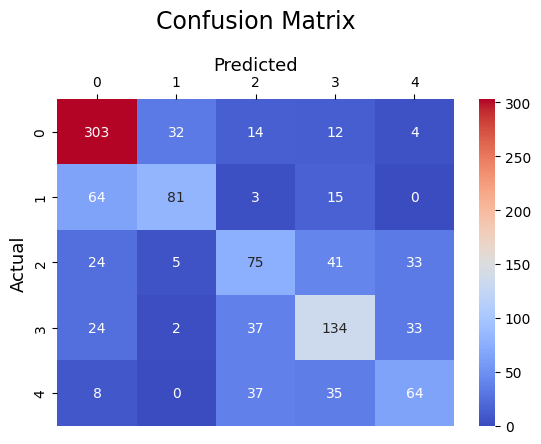

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




Klasifikasi Logistic Regression dengan TF-IDF Vectorizer:

Confusion Matrix
[[309  18  14  22   2]
 [ 77  69   4  13   0]
 [ 20   4  88  49  17]
 [ 23   1  40 148  18]
 [ 10   0  43  40  51]]


Accuracy: 61.57407407407407
Precision: 60.86288009140749
Recall: 55.23830351818957
F1-Score: 56.373876527608694


              precision    recall  f1-score   support

           0       0.58      0.35      0.44       144
           1       0.47      0.49      0.48       178
           2       0.70      0.85      0.77       365
           3       0.75      0.42      0.54       163
           4       0.54      0.64      0.59       230

    accuracy                           0.62      1080
   macro avg       0.61      0.55      0.56      1080
weighted avg       0.62      0.62      0.60      1080



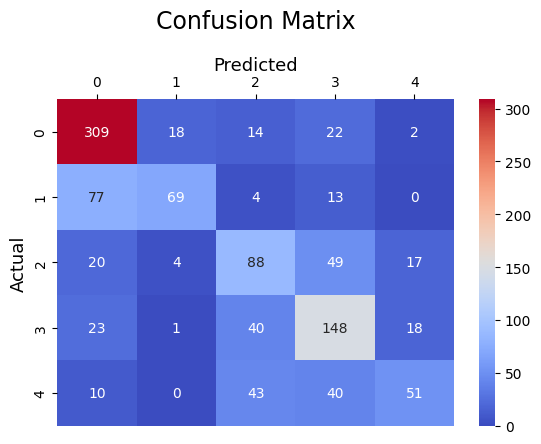

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




Klasifikasi Logistic Regression dengan Hashing Vectorizer:

Confusion Matrix
[[317  17  13  15   3]
 [ 79  64   5  15   0]
 [ 22   4  85  48  19]
 [ 30   1  42 137  20]
 [ 11   0  41  39  53]]


Accuracy: 60.74074074074074
Precision: 59.78143835369172
Recall: 54.04734013701973
F1-Score: 55.20274028983047


              precision    recall  f1-score   support

           0       0.56      0.37      0.44       144
           1       0.46      0.48      0.47       178
           2       0.69      0.87      0.77       365
           3       0.74      0.39      0.51       163
           4       0.54      0.60      0.57       230

    accuracy                           0.61      1080
   macro avg       0.60      0.54      0.55      1080
weighted avg       0.61      0.61      0.59      1080



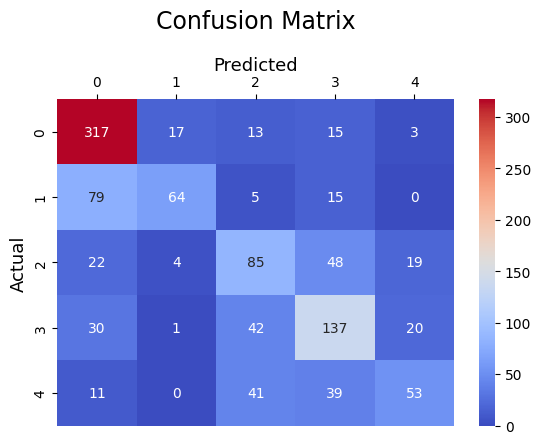



Klasifikasi Decision Tree dengan Count Vectorizer:

Confusion Matrix
[[262  53  15  23  12]
 [ 62  73   6   7  15]
 [ 32  12  59  42  33]
 [ 24  10  43 121  32]
 [ 10   3  35  31  65]]


Accuracy: 53.70370370370371
Precision: 49.656952244104104
Recall: 49.491949989644205
F1-Score: 49.502633988815795


              precision    recall  f1-score   support

           0       0.41      0.45      0.43       144
           1       0.37      0.33      0.35       178
           2       0.67      0.72      0.69       365
           3       0.48      0.45      0.46       163
           4       0.54      0.53      0.53       230

    accuracy                           0.54      1080
   macro avg       0.50      0.49      0.50      1080
weighted avg       0.53      0.54      0.53      1080



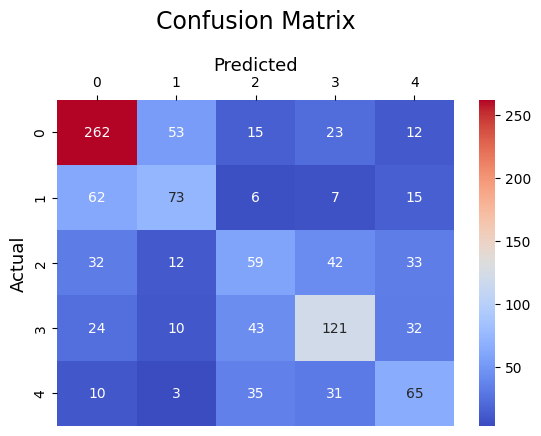



Klasifikasi Decision Tree dengan TF-IDF Vectorizer:

Confusion Matrix
[[257  59  17  17  15]
 [ 59  74   6   9  15]
 [ 22   3  62  43  48]
 [ 23   8  37 123  39]
 [  7   2  38  42  55]]


Accuracy: 52.87037037037037
Precision: 48.76254695574751
Recall: 48.4627795796823
F1-Score: 48.50659634136054


              precision    recall  f1-score   support

           0       0.32      0.38      0.35       144
           1       0.39      0.35      0.37       178
           2       0.70      0.70      0.70       365
           3       0.51      0.45      0.48       163
           4       0.53      0.53      0.53       230

    accuracy                           0.53      1080
   macro avg       0.49      0.48      0.49      1080
weighted avg       0.53      0.53      0.53      1080



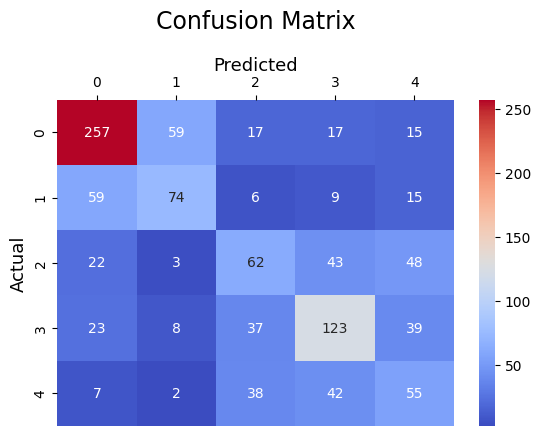



Klasifikasi Decision Tree dengan Hashing Vectorizer:

Confusion Matrix
[[264  43  21  22  15]
 [ 58  71   5   9  20]
 [ 26   5  56  47  44]
 [ 22   5  40 118  45]
 [  8   4  36  38  58]]


Accuracy: 52.5
Precision: 48.60970802228714
Recall: 47.78596981860894
F1-Score: 47.92774646195911


              precision    recall  f1-score   support

           0       0.32      0.40      0.36       144
           1       0.35      0.31      0.33       178
           2       0.70      0.72      0.71       365
           3       0.55      0.44      0.49       163
           4       0.50      0.51      0.51       230

    accuracy                           0.53      1080
   macro avg       0.49      0.48      0.48      1080
weighted avg       0.53      0.53      0.52      1080



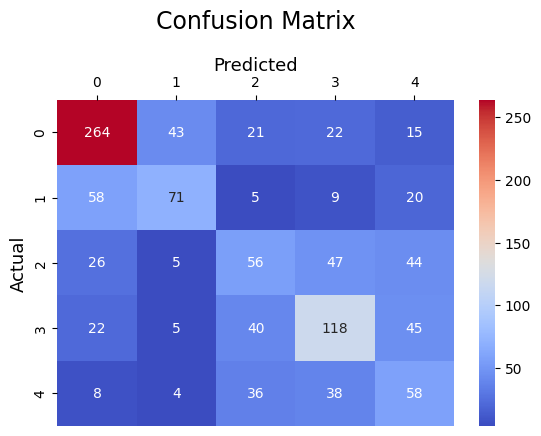



Klasifikasi K-Nearest Neighbor dengan Count Vectorizer:

Confusion Matrix
[[320  12   6  16  11]
 [108  26   1  18  10]
 [ 64   7  23  45  39]
 [ 53  10  17 118  32]
 [ 22   6  17  46  53]]


Accuracy: 50.0
Precision: 44.02184710204386
Recall: 40.930680963672074
F1-Score: 39.49291410417794


              precision    recall  f1-score   support

           0       0.37      0.37      0.37       144
           1       0.36      0.13      0.19       178
           2       0.56      0.88      0.69       365
           3       0.43      0.16      0.23       163
           4       0.49      0.51      0.50       230

    accuracy                           0.50      1080
   macro avg       0.44      0.41      0.39      1080
weighted avg       0.47      0.50      0.45      1080



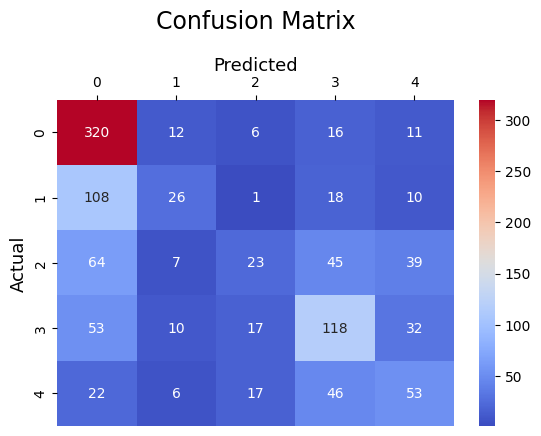



Klasifikasi K-Nearest Neighbor dengan TF-IDF Vectorizer:

Confusion Matrix
[[350   7   4   3   1]
 [132  28   1   1   1]
 [ 71   3  44  35  25]
 [ 83   1  22 100  24]
 [ 46   1  22  27  48]]


Accuracy: 52.77777777777778
Precision: 55.471457678220204
Recall: 42.91980407916552
F1-Score: 43.38548871970972


              precision    recall  f1-score   support

           0       0.48      0.33      0.40       144
           1       0.47      0.25      0.32       178
           2       0.51      0.96      0.67       365
           3       0.70      0.17      0.28       163
           4       0.60      0.43      0.51       230

    accuracy                           0.53      1080
   macro avg       0.55      0.43      0.43      1080
weighted avg       0.55      0.53      0.48      1080



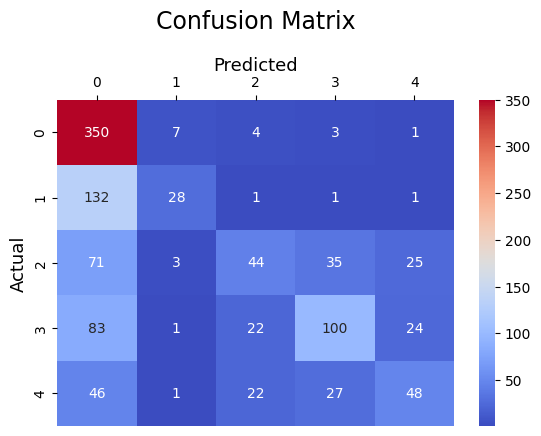



Klasifikasi K-Nearest Neighbor dengan Hashing Vectorizer:

Confusion Matrix
[[342   7  11   3   2]
 [124  23  11   4   1]
 [ 79   1  48  29  21]
 [ 75   2  24 103  26]
 [ 34   0  36  30  44]]


Accuracy: 51.85185185185185
Precision: 53.3337761604252
Recall: 42.02270319417565
F1-Score: 42.07334270275061


              precision    recall  f1-score   support

           0       0.47      0.31      0.37       144
           1       0.37      0.27      0.31       178
           2       0.52      0.94      0.67       365
           3       0.70      0.14      0.23       163
           4       0.61      0.45      0.52       230

    accuracy                           0.52      1080
   macro avg       0.53      0.42      0.42      1080
weighted avg       0.53      0.52      0.47      1080



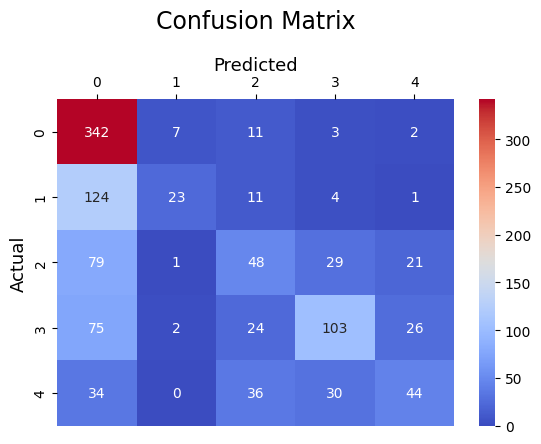



Klasifikasi Random Forest dengan Count Vectorizer:

Confusion Matrix
[[313  25   7  14   6]
 [ 90  56   3   2  12]
 [ 39   6  70  32  31]
 [ 30   4  42 128  26]
 [ 12   0  33  35  64]]


Accuracy: 58.425925925925924
Precision: 55.61516918505524
Recall: 51.90634278650206
F1-Score: 52.62998066139723


              precision    recall  f1-score   support

           0       0.46      0.44      0.45       144
           1       0.45      0.39      0.42       178
           2       0.65      0.86      0.74       365
           3       0.62      0.34      0.44       163
           4       0.61      0.56      0.58       230

    accuracy                           0.58      1080
   macro avg       0.56      0.52      0.53      1080
weighted avg       0.58      0.58      0.57      1080



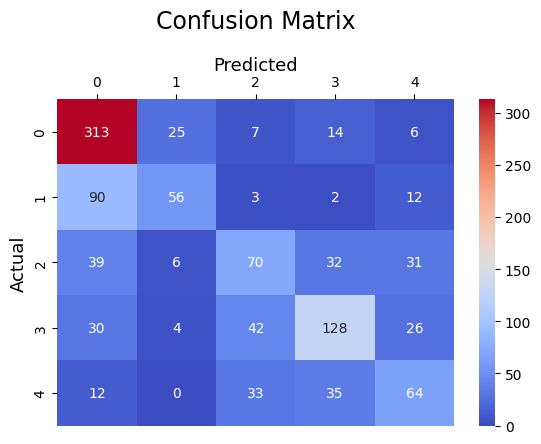



Klasifikasi Random Forest dengan TF-IDF Vectorizer:

Confusion Matrix
[[313  22  11  11   8]
 [ 95  48   7   5   8]
 [ 25   4  83  37  29]
 [ 22   4  43 136  25]
 [  9   1  40  35  59]]


Accuracy: 59.166666666666664
Precision: 55.95516113951939
Recall: 52.38662958124949
F1-Score: 52.834755687563884


              precision    recall  f1-score   support

           0       0.46      0.41      0.43       144
           1       0.45      0.47      0.46       178
           2       0.67      0.86      0.76       365
           3       0.61      0.29      0.40       163
           4       0.61      0.59      0.60       230

    accuracy                           0.59      1080
   macro avg       0.56      0.52      0.53      1080
weighted avg       0.58      0.59      0.58      1080



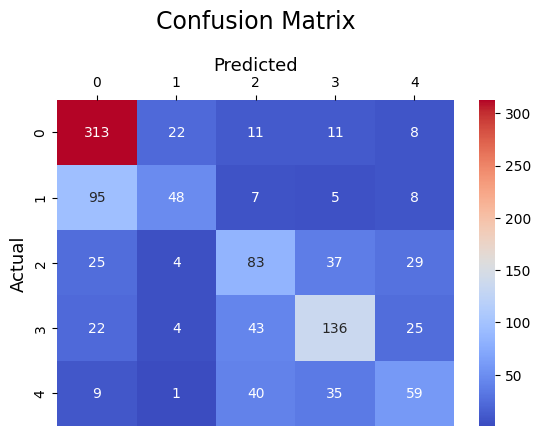



Klasifikasi Random Forest dengan Hashing Vectorizer:

Confusion Matrix
[[336   8   8   8   5]
 [105  42   1   7   8]
 [ 35   3  56  60  24]
 [ 29   0  45 139  17]
 [ 10   0  33  47  54]]


Accuracy: 58.05555555555556
Precision: 57.3811091214304
Recall: 49.44342449043823
F1-Score: 49.92395568892133


              precision    recall  f1-score   support

           0       0.50      0.38      0.43       144
           1       0.39      0.31      0.35       178
           2       0.65      0.92      0.76       365
           3       0.79      0.26      0.39       163
           4       0.53      0.60      0.57       230

    accuracy                           0.58      1080
   macro avg       0.57      0.49      0.50      1080
weighted avg       0.58      0.58      0.55      1080



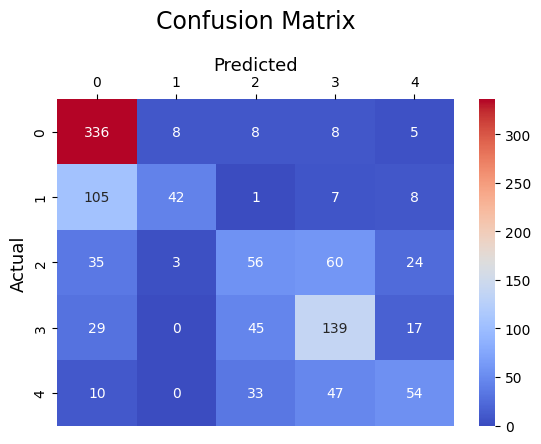

In [39]:
classification = [svm, lr, dt, knn, rf]
clf_label = ['Support Vector Machine', 'Logistic Regression', 'Decision Tree', 'K-Nearest Neighbor', 'Random Forest']
vect = [co_vect, tf_vect, hash_vect]
vect_label = ['Count Vectorizer', 'TF-IDF Vectorizer', 'Hashing Vectorizer']

for i in range(len(classification)):
    for j in range(len(vect)):
        train = train_model(classification[i], vect[j], x_train, y_train)
        y_pred = train.predict(x_test)
        findEvaluation(y_test, y_pred, clf_label[i], vect_label[j])



Klasifikasi Multinomial Naive Bayes dengan Count Vectorizer:

Confusion Matrix
[[330  15   6  14   0]
 [107  47   3   6   0]
 [ 33   3  71  55  16]
 [ 48   1  36 138   7]
 [ 14   1  42  50  37]]


Accuracy: 57.68518518518518
Precision: 58.250837467294645
Recall: 48.96547992524262
F1-Score: 49.793669584083204


              precision    recall  f1-score   support

           0       0.62      0.26      0.36       144
           1       0.45      0.40      0.42       178
           2       0.62      0.90      0.74       365
           3       0.70      0.29      0.41       163
           4       0.52      0.60      0.56       230

    accuracy                           0.58      1080
   macro avg       0.58      0.49      0.50      1080
weighted avg       0.58      0.58      0.55      1080



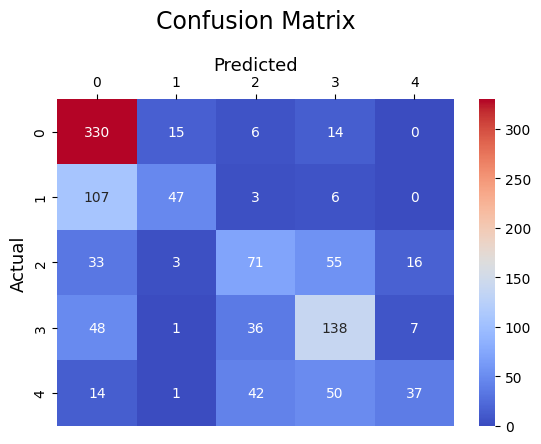



Klasifikasi Multinomial Naive Bayes dengan TF-IDF Vectorizer:

Confusion Matrix
[[353   1   1  10   0]
 [147  12   0   4   0]
 [ 62   0  35  80   1]
 [ 70   0  15 145   0]
 [ 33   0  26  69  16]]


Accuracy: 51.94444444444445
Precision: 66.40810273318014
Recall: 39.57836053552053
F1-Score: 36.68203109426629


              precision    recall  f1-score   support

           0       0.94      0.11      0.20       144
           1       0.45      0.20      0.27       178
           2       0.53      0.97      0.69       365
           3       0.92      0.07      0.14       163
           4       0.47      0.63      0.54       230

    accuracy                           0.52      1080
   macro avg       0.66      0.40      0.37      1080
weighted avg       0.62      0.52      0.44      1080



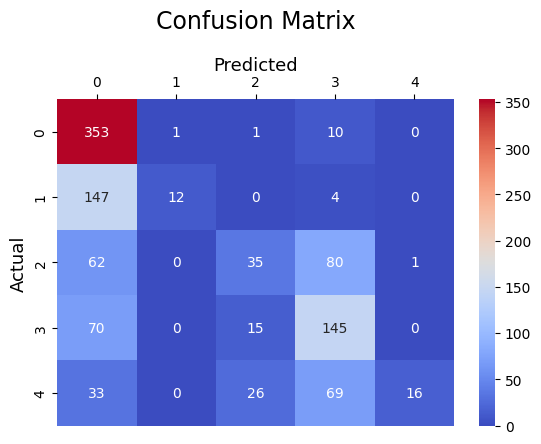



Klasifikasi Complement Naive Bayes dengan Count Vectorizer:

Confusion Matrix
[[329  12   9  12   3]
 [ 96  53   4   2   8]
 [ 29   4  74  43  28]
 [ 46   2  40 123  19]
 [  9   7  46  30  52]]


Accuracy: 58.425925925925924
Precision: 56.240796501309575
Recall: 50.76294588264485
F1-Score: 51.65773172873095


              precision    recall  f1-score   support

           0       0.47      0.36      0.41       144
           1       0.43      0.42      0.42       178
           2       0.65      0.90      0.75       365
           3       0.68      0.33      0.44       163
           4       0.59      0.53      0.56       230

    accuracy                           0.58      1080
   macro avg       0.56      0.51      0.52      1080
weighted avg       0.58      0.58      0.56      1080



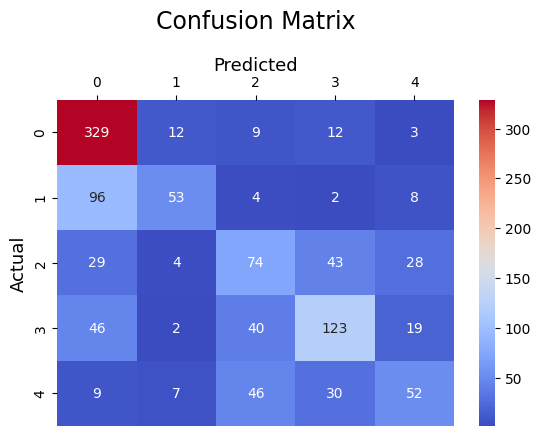



Klasifikasi Complement Naive Bayes dengan TF-IDF Vectorizer:

Confusion Matrix
[[325  11   9  16   4]
 [ 98  52   4   2   7]
 [ 33   4  60  45  36]
 [ 45   3  39 127  16]
 [ 10   5  39  37  53]]


Accuracy: 57.12962962962963
Precision: 54.861201437247416
Recall: 49.33474968193024
F1-Score: 50.14433116910935


              precision    recall  f1-score   support

           0       0.46      0.37      0.41       144
           1       0.40      0.34      0.36       178
           2       0.64      0.89      0.74       365
           3       0.69      0.32      0.44       163
           4       0.56      0.55      0.56       230

    accuracy                           0.57      1080
   macro avg       0.55      0.49      0.50      1080
weighted avg       0.57      0.57      0.55      1080



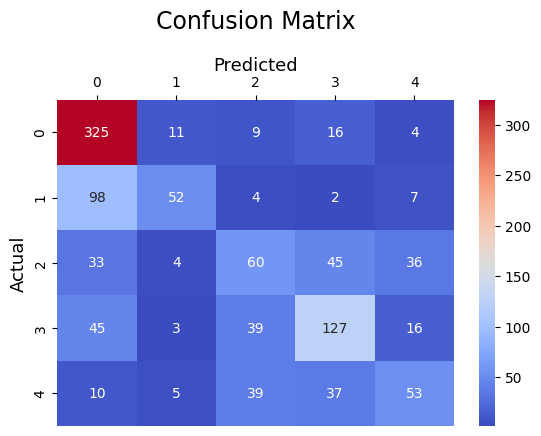



Klasifikasi Bernoulli Naive Bayes dengan Count Vectorizer:

Confusion Matrix
[[345   5   4  11   0]
 [148  12   0   3   0]
 [ 61   0  35  81   1]
 [ 71   0  16 143   0]
 [ 37   0  22  73  12]]


Accuracy: 50.64814814814815
Precision: 61.28919681544629
Recall: 38.41053577210315
F1-Score: 35.22439624054095


              precision    recall  f1-score   support

           0       0.92      0.08      0.15       144
           1       0.45      0.20      0.27       178
           2       0.52      0.95      0.67       365
           3       0.71      0.07      0.13       163
           4       0.46      0.62      0.53       230

    accuracy                           0.51      1080
   macro avg       0.61      0.38      0.35      1080
weighted avg       0.58      0.51      0.43      1080



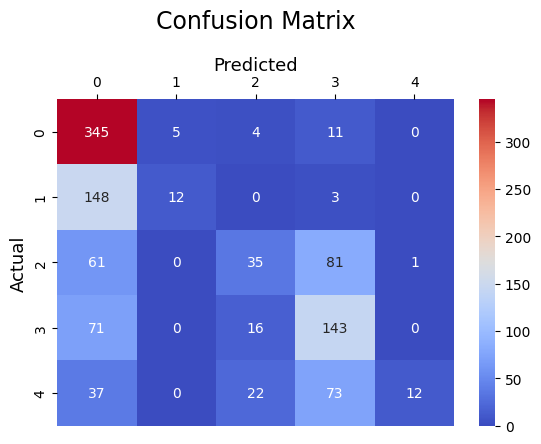



Klasifikasi Bernoulli Naive Bayes dengan TF-IDF Vectorizer:

Confusion Matrix
[[345   5   4  11   0]
 [148  12   0   3   0]
 [ 61   0  35  81   1]
 [ 71   0  16 143   0]
 [ 37   0  22  73  12]]


Accuracy: 50.64814814814815
Precision: 61.28919681544629
Recall: 38.41053577210315
F1-Score: 35.22439624054095


              precision    recall  f1-score   support

           0       0.92      0.08      0.15       144
           1       0.45      0.20      0.27       178
           2       0.52      0.95      0.67       365
           3       0.71      0.07      0.13       163
           4       0.46      0.62      0.53       230

    accuracy                           0.51      1080
   macro avg       0.61      0.38      0.35      1080
weighted avg       0.58      0.51      0.43      1080



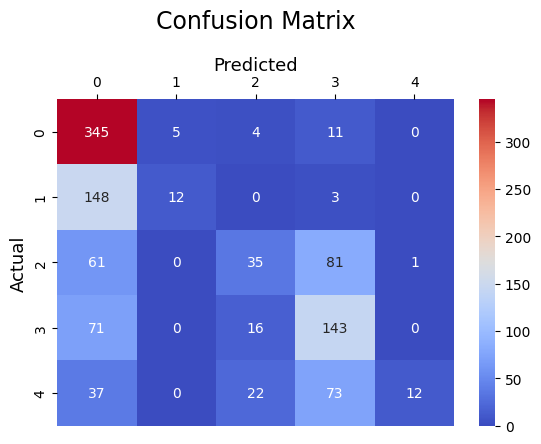

In [38]:
mnb = MultinomialNB()
cnb = ComplementNB()
bnb = BernoulliNB()

modelNB = [mnb, cnb, bnb]
modelNB_label = ['Multinomial Naive Bayes', 'Complement Naive Bayes', 'Bernoulli Naive Bayes']

vectNB = [co_vect, tf_vect]
vectNB_label = ['Count Vectorizer', 'TF-IDF Vectorizer']

for i in range(len(modelNB)):
    for j in range(len(vectNB)):
        train = train_model(modelNB[i], vectNB[j], x_train, y_train)
        y_pred = train.predict(x_test)
        findEvaluation(y_test, y_pred, modelNB_label[i], vectNB_label[j])

In [32]:
# berdasarkan hasil evaluasi di atas, akurasi tertinggi hanya logistic regression dengan TF-IDF
model_lr_tf = Pipeline([('vectorizer',tf_vect),('classifier',lr)])
model_lr_tf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [34]:
import pickle
pickle.dump(lr, open('model/machine_learning/logistic_regression/lr.pkl', 'wb'))

In [ ]:
# def findEvaluation(test, pred):
#     cm = confusion_matrix(test, pred)
#     print("Confusion Matrix")
#     print(cm)

#     print("\n")
#     print("Accuracy:", accuracy_score(test, pred) * 100)
#     print("Precision:", precision_score(test, pred, average='macro') * 100)
#     print("Recall:", recall_score(test, pred, average='macro') * 100)
#     print("F1-Score:", f1_score(test, pred, average='macro') * 100)
#     print("\n")
#     print(classification_report(test, pred))

#     sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm')
#     plt.title('Confusion Matrix', fontsize=17, pad=20)
#     plt.gca().xaxis.set_label_position('top')
#     plt.ylabel('Actual', fontsize=13)
#     plt.xlabel('Predicted', fontsize=13)
#     plt.gca().xaxis.tick_top()

#     plt.gca().figure.subplots_adjust(bottom=0.2)
#     plt.show()

# def model_fit(classification, class_label, vect, vect_label, x_train, x_test, y_train, y_test):
#     model = Pipeline([('vectorizer',vect),('classifier', classification)])
#     train = model.fit(x_train, y_train)
#     y_pred = train.predict(x_test)
#     print("\n")
#     print("Klasifikasi "+ class_label + " dengan " + vect_label + ":\n")
#     findEvaluation(y_test, y_pred)

In [ ]:
# vect = [co_vect, tf_vect, hash_vect]
# vect_label = ['Count Vectorizer', 'TF-IDF Vectorizer', 'Hashing Vectorizer']

# for i in range(len(model)):
#     for j in range(len(vect)):
#         train_model(model[i], model_label[i], vect[j], vect_label[j], x_train, x_test, y_train, y_test)
        

In [ ]:
# def findEvaluationDirect(test, pred):
#     accuracy = accuracy_score(test, pred)
#     precision = precision_score(test, pred, average='macro')
#     recall  = recall_score(test, pred, average='macro')
#     f1 = f1_score(test, pred, average='macro')
    
#     print("Accuracy:", accuracy*100)
#     print("Precision:", precision*100)
#     print("Recall:",recall*100)
#     print("F1-Score:",f1*100)
#     print(classification_report(test, pred))
#     print(confusion_matrix(test, pred))
#     print("\n")

# def rf(x_train, x_test, y_train, y_test):
#     from sklearn.ensemble import RandomForestClassifier
#     rf = RandomForestClassifier(random_state=42)
#     rf.fit(x_train, y_train)
#     # Make predictions on the test set
#     y_pred = rf.predict(x_test)
    
#     # Evaluate the accuracy of the classifier
#     findEvaluationDirect(y_test, y_pred)

# def split(x, y):
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=225)
#     rf(x_train, x_test, y_train, y_test)

In [ ]:
# y = y_replaced # emotion field

# print("Klasifikasi Count RF")
# split(x_co, y)

# print("Klasifikasi TF RF")
# split(x_tf, y)

# print("Klasifikasi Hash RF")
# # split(x_hash, y)

Perbandingan hasil: 
1. Harus split teks ulasan sebelum ubah teks nya ke feature extractabs
2. Ga boleh ubah teks ulasan sebelum split train ke feature extract

In [ ]:
# rf.fit_transform(x_train, y_train)
# lihat hasil output, kalo mau tau kenapa harus split sebelum ubah value train test ke feature
# extract
# x = x_cleaned
# y = y_replaced
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=225)
# print(x_train.shape)
# print(x_test.shape)
# print(co_vect.fit_transform(x_train).shape)
# print(co_vect.fit_transform(x_test).shape)

In [ ]:
# lihat hasil output, kalo mau tau kenapa ga boleh ubah value ke feature extract dulu sebelum split
# x = x_co
# y = y_replaced
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=225)
# print(x_train.shape)
# print(x_test.shape)

In [ ]:
# print(x_co.shape)

In [ ]:
# print(x_train.toarray())

In [ ]:
# print(x_test.toarray())

Lihat hasil yg sebelum split agak curiga hasil "6946" kenapa sama banget padahal udah dibagi loh apalagi banyaknya elemen juga mesti beda karena setiap banyaknya datarow juga berbeda, mending pilih yg split terlebih dahulu sebelum ubahnya supaya hasil signifikan

In [ ]:
# from transformers import AutoTokenizer, AutoModelForSequenceClassification,AutoModel,BertTokenizer,AutoConfig
# from transformers import TrainingArguments
# from transformers import Trainer
# from transformers import pipeline
# from datasets import Dataset
# from sklearn.metrics import precision_recall_fscore_support
# from sklearn.metrics import accuracy_score

In [ ]:
from nltk.tokenize import word_tokenize
sentence = ' hello  apple  '
sentence = word_tokenize(sentence)
filterr = []
for word in sentence:
    filterr.append(word)
filterr = [word for word in sentence if word]
sentence = ' '.join(filterr)
print(sentence)